<a href="https://colab.research.google.com/github/Ammonchip/TensorFlowTutorial/blob/main/No%C3%A7%C3%B5es_B%C3%A1sicas_de_Classifica%C3%A7%C3%B5es_de_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow  e tf.keras
import tensorflow as tf
from tensorflow import keras

# Libraries auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

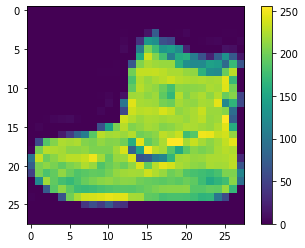

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

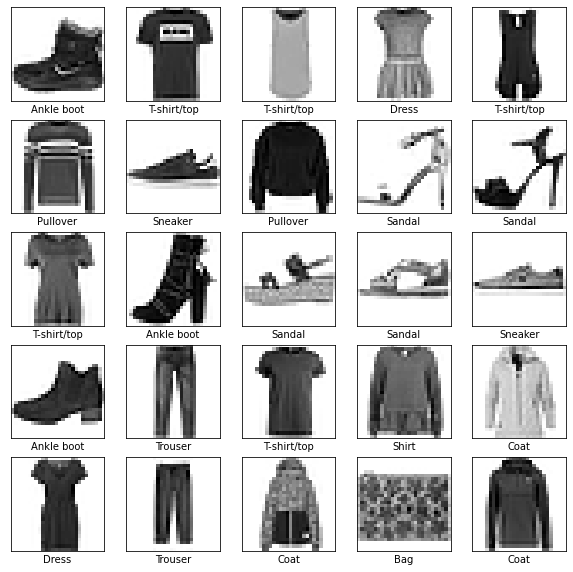

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape = (28, 28)),
  keras.layers.Dense(128, activation = 'relu'),
  keras.layers.Dense(10, activation = 'softmax')
])

In [13]:
model.compile(optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = ['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6460 - accuracy: 0.7757
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3849 - accuracy: 0.8604
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3107 - accuracy: 0.8851
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2944 - accuracy: 0.8901
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2786 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2616 - accuracy: 0.9048
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2565 - accuracy: 0.9050
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2401 - accuracy: 0.9118
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.234

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3237 - accuracy: 0.8848

Test accuracy: 0.8848000168800354


In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([1.9902848e-06, 3.3137060e-06, 1.5697686e-06, 3.4251681e-11,
       8.7068173e-07, 1.0674539e-03, 4.9176847e-06, 1.3818179e-01,
       1.3755648e-06, 8.6073679e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
def plot_image(i, predictions_array, true_label, img) :
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label :
    color = 'blue'
  else :
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})" .format(class_names[predicted_label],
                                        100 * np.max(predictions_array),
                                        class_names[true_label]),
                                        color = color)
  
def plot_value_array(i, predictions_array, true_label) :
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

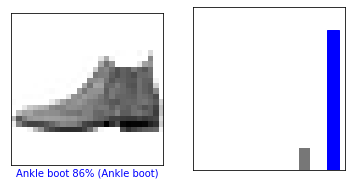

In [21]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

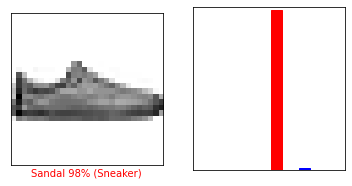

In [22]:
i = 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

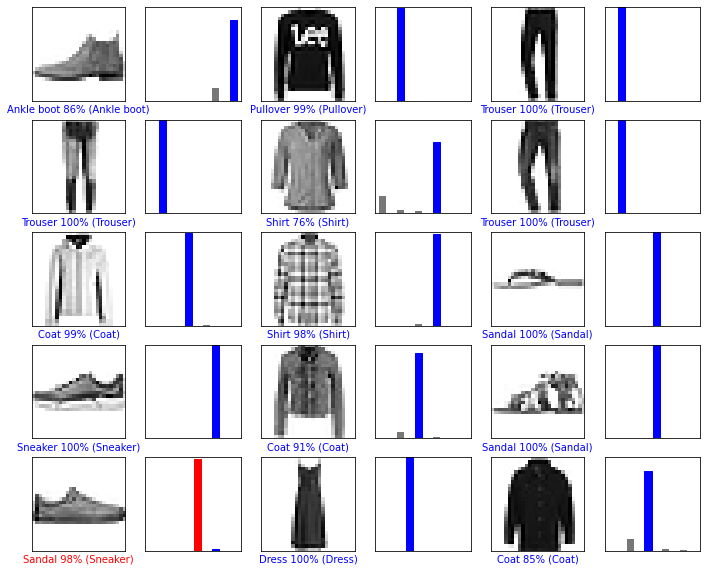

In [23]:
#Plota os primeiros X test_images, as labels preditas e as labels verdadeiras
#Colore as predições corretas de azul e as incorretas de vermelho

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images) :
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [24]:
#Pegue uma imagem do dataset de imagens de teste
img = test_images[0]
print(img.shape)

(28, 28)


In [25]:
#Adiciona a imagem em um batch que possui um só membro
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.9902773e-06 3.3137155e-06 1.5697611e-06 3.4251681e-11 8.7067849e-07
  1.0674539e-03 4.9176756e-06 1.3818179e-01 1.3755634e-06 8.6073679e-01]]


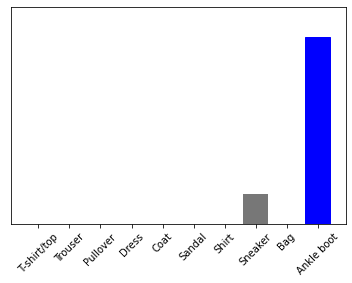

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

In [29]:
np.argmax(predictions_single[0])

9